# 02-Ethics (Bias)

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Goals of this lecture

- Case Study 1: How machine learning can perpetuate inequality.
- What is ethics and why does it matter for CSS?
- Bias in action: where does it come from? 
- Exploring **fairness**.

## Case Study 1: How machine learning can perpetuate inequality in the court system

### The court system involves life-altering decisions

- In the USA, judges make life-altering decisions about defendants:
  - [Determining **bail amounts**](https://en.wikipedia.org/wiki/Bail)
  - [Determining **sentence length**](https://www.justice.gov/usao/justice-101/sentencing)
- These decisions are often [**biased** and can perpetuate racial inequality.](https://www.brennancenter.org/our-work/analysis-opinion/bfd-criminal-justice-reform?ms=gad_sentencing%20reform_617065346569_8628877148_145936558771) 
- More recently, some researchers and companies have offered a "solution": **risk scores**.

### How risk scores work

> A **risk score** is a number (usually assigned by a statistical model) that estimates the *likelihood* that someone will commit another crime.

These models take various factors as **input**, including:

- The defendant's age.  
- The defendant's history of misconduct.  

As **output**, they produce a score, i.e., the **probability of re-offending**.

### The problem(s) with risk scores

**Problem 1**: They're often not very accurate.

> The score proved remarkably unreliable in forecasting violent crime: Only 20 percent of the people predicted to commit violent crimes actually went on to do so.

**Problem 2**: The *way* in which they're inaccurate is **racially biased**.

> In forecasting who would re-offend, the algorithm made mistakes with black and white defendants at roughly the same rate but in very different ways.

[Source: Propublica](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)


### Brief detour: types of errors

When running a test (e.g., a COVID test), you can make two kinds of errors:

- A **false negative (FN)** is when you have COVID but the test says you don't.  
- A **false positive (FP)** is when you don't have COVID but the test says you do.

![title](img/detection.png)



### Check-in

How would these kinds of errors map onto the **risk score** case we've been discussing?

### Error types and risk scores

In the case of **risk scores**:

- A **false negative** = predicting that someone *won't* reoffend, but they do.
- A **false positive** = predicting that someone *will* reoffend, but they don't.

Which kind of error do you think is worse?

### Racial bias in error types

Overall **prediction accuracy** was similar across race, but *not* the **type of error**:

![title](img/bias_northpointe.png)

[Source: Propublica](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)


### Risk scores can perpetuate racial injustice

- Risk scores are **racially biased** in the types of errors they make.  
- This is **unjust**: it means that decisions about *sentencing* and *bail* could also be racially biased.  

But if it's [illegal to discriminate on the basis of race](https://www.dol.gov/agencies/oasam/civil-rights-center/statutes/civil-rights-act-of-1964), how are these risk scores allowed?


#### Problem 1: Proxy discrimination

- Risk assessment models usually don't **explicitly** include race as a factor.
- Instead, they include **correlates** of race (such as ZIP code).
   - This is called **redundant encoding** or [**proxy discrimination**](https://ilr.law.uiowa.edu/assets/Uploads/ILR-105-3-Prince-Schwarcz-6.pdf).
- Because of historical racial injustices, these correlates are also correlated with reoffense. 

> Now populations that have historically been **disproportionately targeted by law enforcement**—especially low-income and minority communities—are at risk of being slapped with high recidivism scores. As a result, **the algorithm could amplify and perpetuate embedded biases and generate even more bias-tainted data** to feed a vicious cycle.

[Source: MIT Technology Review](https://www.technologyreview.com/2019/01/21/137783/algorithms-criminal-justice-ai/)


#### Problem 2: Opaque models

- This software is also typically *proprietary*, so [we don't know exactly what goes into the models](https://en.wikipedia.org/wiki/Black_box).   
- This makes it near-impossible to "cross-examine" a model.
   - Violation of [procedural due process](https://en.wikipedia.org/wiki/Procedural_due_process)?

[Source: MIT Technology Review](https://www.technologyreview.com/2019/01/21/137783/algorithms-criminal-justice-ai/)


### Summing up

- Human judges are subject to bias (including **racial bias**).
- **Risk scores** are an attempt to make this process "objective".  
- Yet many models are **opaque**, potentially violating [due process](https://en.wikipedia.org/wiki/Procedural_due_process).
- Despite equivalent **predictive accuracy** across race, many exhibit racial bias in which **types of errors** they make.
- The use of these models thus **entrenches** pre-existing biases.

Addressing these issues requires discussing of our **values**––this is where **ethics** comes in.

## What is ethics?

The term **"ethics"** can refer to:

- A [**philosophical discipline**](https://en.wikipedia.org/wiki/Ethics) concerned with what is right and what is wrong.
   - Many ethical *theories*: [virtue ethics](https://en.wikipedia.org/wiki/Virtue_ethics), [consequentialism](https://en.wikipedia.org/wiki/Consequentialism), [deontology](https://en.wikipedia.org/wiki/Deontology) and [more](https://en.wikipedia.org/wiki/Ethics#Normative_ethics). 
- Any given **system of ethical values**, i.e., the *result* of reasoning about what's right and wrong.

**"Applied ethics"** involves ethics in the "real world".

- [Bioethics](https://en.wikipedia.org/wiki/Bioethics), [business ethics](https://en.wikipedia.org/wiki/Business_ethics), [machine ethics](https://en.wikipedia.org/wiki/Machine_ethics), and more.
- Here at UCSD, we have the [**Institute for Practical Ethics**](https://ipe.ucsd.edu/), which includes research on [ethics for Data Science](https://ipe.ucsd.edu/research/data-science.html).

## Why ethics for CSS?

### Reason 1: CSS has impact

In CSS, our work can have **real-world impact**.

- Is this impact *positive*?  
- Does this work have the potential to *cause harm*?  
- How does the potential harm compare to *current harms*?

### Reason 2: CSS involves hard decisions

We also face many **difficult questions**.

- Does this work perpetuate *bias*? What exactly is *fairness*? (Today)
- Does this work violate *privacy* or have harmful potential for *dual use*? (Next lecture)
- Am I conducting my data analysis *honestly* and *fairly*? (Throughout course + week 10)
   - How should I treat missing data?
   - Is my sample *representative*?

### Why we *start* with ethics

- Throughout this course, we'll learn about:
   - **Acquiring** and **representing** types of data.  
   - **Analyzing** and **interpreting** data.  
   - Building **predictive models** of data.
- Each of these processes involves *decisions*. 
- **Ethics should be at the forefront of our minds** while making these decisions––not an after-thought.

## Bias in Action

### When the past is biased

When **making predictions**, we often rely on information about the *past* to predict the *future*.

- **Risk scores**: will this person re-offend?
- **Hiring**: will this person be a successful employee?
- **Loans**: will this person pay back their debt?

But what happens when the **past is biased**?

### Racial bias in recidivism predictions

Overall **prediction accuracy** was similar across race, but *not* the **type of error**:

![title](img/bias_northpointe.png)

[Source: Propublica](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)


### Gender bias in hiring

**Problem**: Hiring talented people is hard; we also know that interviewers are subject to bias.

**"Solution"**: Can we automate this with a resume screening tool?

- Look at past and current employees.
- Which features of their resume are predictive of their hiring/success?

Any potential issues with this?

[Source: Reuters](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G)

Hiring is already **biased**––using current data to inform future hiring will just **entrench** that bias.

![title](img/gender.png)

[Source: Reuters](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G)

#### Check-in

What about if we *explicitly removed* features like self-identified gender from a model? Could such a model still be gender-biased?

### Class and racial bias in lending

Assessing **credit risk** is important:

> The correct estimation of credit risk is paramount for the entire system. Failing in the credit risk estimation can lead to systemic failures such as the sub-prime crisis of 2008. 

Hard to determine the right threshold for acceptable risk:

- Overly *lenient* thresholds can lead to **defaults** and trap borrowers in debt.
- Overly *strict* thresholds can **lock out** potential borrowers from building wealth.

[Source: Shi et al. (2022)](https://link.springer.com/article/10.1007/s00521-022-07472-2)


#### Bias in risk assessment

- Historically, lending practices were **overtly racist**, e.g., [**redlining**](https://en.wikipedia.org/wiki/Redlining). 
- Various laws passed (e.g., [Fair Housing Act of 1968](https://www.hud.gov/program_offices/fair_housing_equal_opp/fair_housing_act_overview)) to **protect potential borrowers from discrimination** on the basis of *race*, *religion*, and more.
- But these practices have left **lasting inequities** in credit scores like [FICO](https://www.fico.com/en/products/fico-score).

> If FICO were invented today, would it satisfy a disparate impact test? The conclusion of Rice and Swesnik in their law review article was clear: “Our current credit-scoring systems have a disparate impact on people and communities of color.”

![title](img/fico.png)

[Source: Brookings](https://www.brookings.edu/research/reducing-bias-in-ai-based-financial-services/)

## So where does bias come from?

#### Unrepresentative data

- **Unrepresentative samples** are very common with **image recognition** datasets ([Buolamwini & Gebru, 2018](http://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf)), leading to disparate outcomes:

> Microsoft and IBM classifiers perform best on lighter male faces (error rates of 0.0% and 0.3% respectively)...All classifiers perform worst on darker female faces (20.8% − 34.7% error rate).

- Likely due to historic **under-representation in data**: [Garbage in, garbage out](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out).

![title](img/gender_shades.png)

#### Proxy discrimination

- Explicit discrimination on the basis of protected attributes (e.g., race, religion) is **illegal**.  
- But these attributes often correlate with other features or [**"proxies"** (e.g., ZIP code, income)](https://ilr.law.uiowa.edu/assets/Uploads/ILR-105-3-Prince-Schwarcz-6.pdf).
- Thus, ignoring protected attributes can just make the bias *less visible*:

> AIs armed with big data are **inherently structured to engage in proxy discrimination** whenever they are deprived of information about membership in a legally suspect class whose predictive power cannot be measured more directly by non-suspect data available to the AI. 

[Source: Prince & Schwarcz, 2019](https://ilr.law.uiowa.edu/assets/Uploads/ILR-105-3-Prince-Schwarcz-6.pdf)

## What makes an algorithm "fair"?

### Definition 1: No explicit discrimination?

> A naïve approach might require that the algorithm should **ignore all protected attributes** such as race, color, religion, gender, disability, or family status.

Potential issues?

[Source: Hardt et al. (2016)](https://home.ttic.edu/~nati/Publications/HardtPriceSrebro2016.pdf).

#### Disdavantages

- Can still result in discrimination because of [proxies](https://ilr.law.uiowa.edu/assets/Uploads/ILR-105-3-Prince-Schwarcz-6.pdf).
- Especially problematic with large datasets––can simply make discrimination less *visible*.

>  Simply denying AIs access to the most intuitive proxies for such predictive but suspect characteristics does little to thwart this process; instead it simply causes AIs to locate less intuitive proxies.

### Definition 2: Predictive parity?

> **Predictive parity** meas that an algorithm's predictions are equally *accurate* across relevant groups. I.e., the overall **error rate** is the same.

- E.g., suppose that **risk scores** are equally accurate on average for men and women.

Potential issues?

#### Disadvantages

- Predictions can still be inaccurate in **different ways**, e.g., different rates of **false positives**.

![title](img/bias_northpointe.png)

#### Visual comparison

In [20]:
error_rate = [50, 50]
fp = [30, 70]
fn = [70, 30]
groups = ['Group 1', 'Group 2']

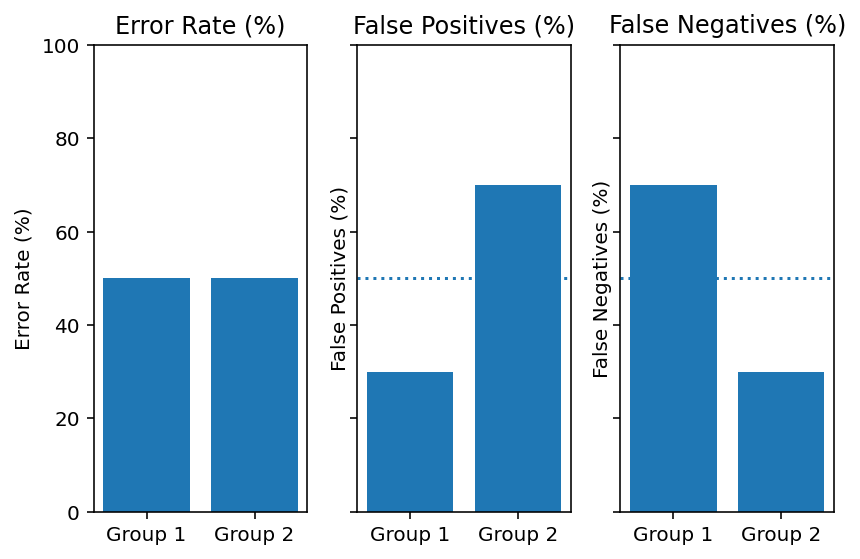

In [23]:
fig, axes = plt.subplots(1, 3, sharey = True)
plt.ylim(0, 100)
axes[0].bar(groups, error_rate)
axes[1].bar(groups, fp)
axes[1].axhline(y = 50, linestyle = "dotted")
axes[2].bar(groups, fn)
axes[2].axhline(y = 50, linestyle = "dotted")
axes[0].set_ylabel("Error Rate (%)")
axes[1].set_ylabel("False Positives (%)")
axes[2].set_ylabel("False Negatives (%)")
axes[0].set_title("Error Rate (%)")
axes[1].set_title("False Positives (%)")
axes[2].set_title("False Negatives (%)")
fig.tight_layout()

### Definition 3: Demographic parity

> **Demographic parity** requires that a decision—such as accepting or denying a loan application—be independent
of the protected attribute...In other words, membership in a protected class should have no correlation with
the decision.

Potential issues?

[Source: Hardt et al. (2016)](https://home.ttic.edu/~nati/Publications/HardtPriceSrebro2016.pdf).

#### Equivalent *predicted scores* across groups

Text(0.5, 1.0, 'Demographic Parity')

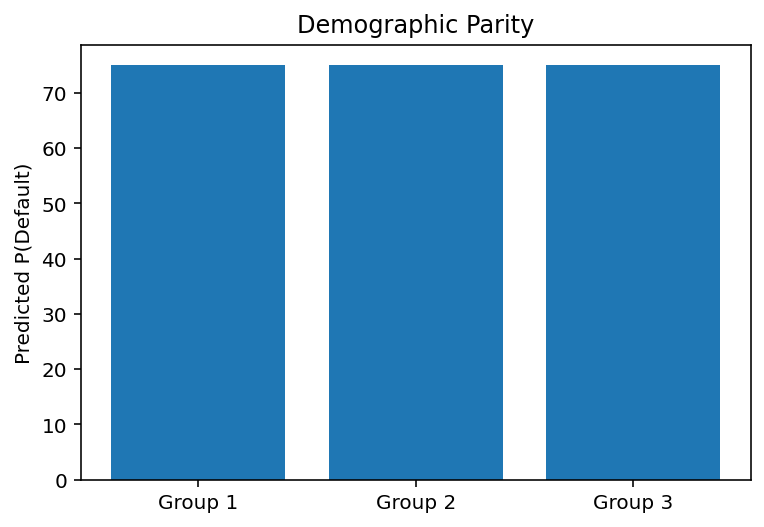

In [16]:
score_parity = [75, 75, 75]
groups = ['Group 1', 'Group 2', 'Group 3']
plt.bar(groups, score_parity)
plt.ylabel("Predicted P(Default)")
plt.title("Demographic Parity")

#### Disadvantages

- What if the [base rates](https://en.wikipedia.org/wiki/Base_rate) are different?
   - E.g., suppose men are more likely than women to **default** on a loan (Not necessarily true––just for the sake of illustration!). 

Text(0.5, 1.0, 'Different True P(Default) Across Groups')

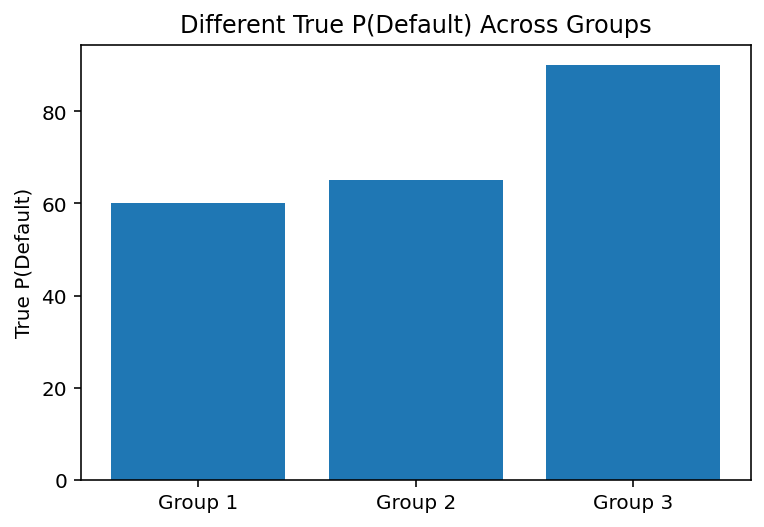

In [18]:
true_probability = [60, 65, 90]
groups = ['Group 1', 'Group 2', 'Group 3']
plt.bar(groups, true_probability)
plt.ylabel("True P(Default)")
plt.title("Different True P(Default) Across Groups")

If base rates are different across groups, **demographic parity** can lead to different *accuracy* across groups.

- Predicted $\%$ **overestimates** true $\%$ for `Group 1` and `Group 2`.
- Prediction $\%$ **underestimates** true $\%$ for `Group 3`.

In [35]:
scores = [75, 75, 75, 60, 65, 90]
groups = ['Group 1', 'Group 2', 'Group 3','Group 1', 'Group 2', 'Group 3']
label = ["Predicted %", "Predicted %", "Predicted %", "True %", "True %", "True %"]
df_scores = pd.DataFrame({"Score": scores,
                         "Label": label,
                         "Group": groups})

Text(0.5, 1.0, 'Demographic parity != Predictive Parity')

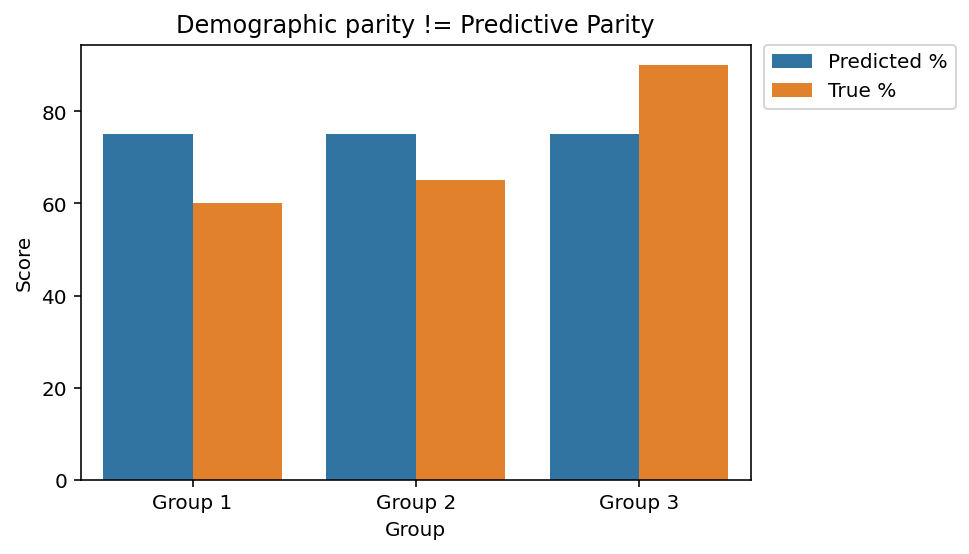

In [36]:
sns.barplot(data = df_scores, x = 'Group',
           y = 'Score', hue = 'Label')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Demographic parity != Predictive Parity")

#### Disadvantages

- What if the [base rates](https://en.wikipedia.org/wiki/Base_rate) are different?
   - E.g., suppose men are more likely than women to **default** on a loan (Not necessarily true––just for the sake of illustration!). 
- In this case, we can't have both **predictive parity** and **demographic parity**.
   

**Counterpoint**: if certain differences exist because of **historical/ongoing biases** (e.g., *redlining*, *racial discrimination in the court system*, etc.), perhaps we *should* **correct** for them in the model?

### What's fair?

Different notions of **fairness** [cannot always be implemented simultaneously](https://arxiv.org/pdf/1609.05807.pdf).
  - This is especially true when society contains **pre-existing biases**.
  - Decisions often involve [trade-offs](https://en.wikipedia.org/wiki/Trade-off). 
  
What seems most fair to you?

- **Ignoring protected attributes**: group identity not considered in model.  
- **Predictive parity**: same accuracy rates across groups.  
- **Demographic parity**: same prediction rates across groups.


## Other resources

This lecture has really only *scratched the surface* of issues in **bias and fairness**.

In recent years, many excellent books have been published relating to this topic:

- [Weapons of Math Destruction](https://en.wikipedia.org/wiki/Weapons_of_Math_Destruction). 
- [Algorithmic Oppression](https://nyupress.org/9781479837243/algorithms-of-oppression/).
- [Data Feminism](https://mitpress.mit.edu/9780262044004/data-feminism/).  
- [Automating Inequality](https://us.macmillan.com/books/9781250074317/automatinginequality).  
- [AI Ethics](https://mitpress.mit.edu/9780262538190/ai-ethics/). 
- [The Alignment Problem](https://brianchristian.org/the-alignment-problem/). 

## Conclusion

As noted, this lecture is just an introduction. But hopefully you now have the conceptual tools to:

- **Explain** how and why *bias* can arise in "data-driven" predictive models.  
- **Compare** different approaches towards correcting this bias.  
- **Describe** the challenges involved in building "fair" data-driven models.